# 일원 카이제곱 검정(one-way chi-squared test)

In [4]:
from pandas import DataFrame

# 관찰빈도
xo = [324, 78, 261]
# 기대빈도
xe = [371, 80, 212]
# df로 
xc = DataFrame([xo, xe],
              columns = ['A','B','C'],
              index = ['Obs', 'Exp'])
xc

,A,B,C
Obs,324,78,261
Exp,371,80,212


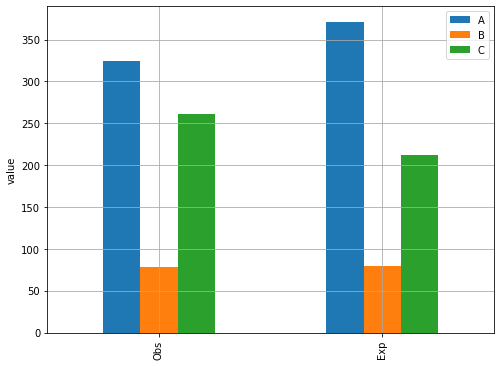

In [5]:
# bar plot을 그려보자
import matplotlib.pyplot as plt
%matplotlib inline

ax = xc.plot(kind='bar', figsize=(8,6))
ax.set_ylabel('value')
plt.grid(color='darkgray')
plt.show()

In [6]:
from scipy.stats import chisquare

result = chisquare(xo, f_exp=xe)
result

Power_divergenceResult(statistic=17.329649595687332, pvalue=0.00017254977751013492)

In [ ]:
# p-value가 0.0001725로 유의수준 0.05보다 아주 작으므로 귀무가설을 기각하고, 대립가설을 지지한다.
# 즉, 관찰빈도와 기대빈도는 다르다.

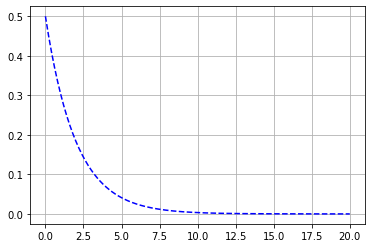

In [39]:
# 카이제곱분포의 플롯을 그려보자.
from numpy import linspace
from scipy.stats import chi2

df = 2 # 자유도
# linspace(0부터 20까지 201개의 점)
x = linspace(0, 20, 201)
y = chi2(df).pdf(x)

plt.plot(x,y,'b--')
plt.grid()
plt.show()

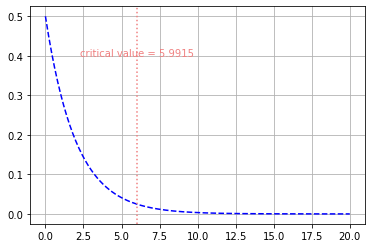

In [32]:
# 여기에서 수직선과 text를 이용하여 p-value의 위치를 표시해보자
x95 = chi2(df).ppf(.95)
plt.plot(x, y, 'b--')

plt.axvline(x=x95, color='lightcoral', linestyle=':')
plt.text(x95, .4, 'critical value = ' + str(round(x95, 4)),
        horizontalalignment='center',color='lightcoral')
plt.grid()
plt.show()

In [ ]:
# 이 점선의 왼쪽은 귀무가설을 채택하는 영역이고, 오른쪽은 귀무가설을 기각하는 영역이다.
# 카이제곱검정의 통계량을 플롯으로 그려보자.

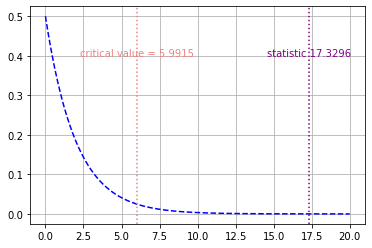

In [33]:
x95 = chi2(df).ppf(.95)
plt.plot(x, y, 'b--')

plt.axvline(x=x95, color='lightcoral', linestyle=':')
plt.text(x95, .4, 'critical value = ' + str(round(x95, 4)),
        horizontalalignment='center',color='lightcoral')

plt.axvline(x=result[0], color='purple', linestyle=':')
plt.text(result[0], .4, 'statistic '+ str(round(result[0], 4)),
         horizontalalignment='center', color='purple')
plt.grid()
plt.show()

In [ ]:
# 결론 : 따라서 통계량은 critical value(임계치)의 오른쪽에 위치하므로 귀무가설을 기각한다.

# 이원 카이제곱 검정

## 예제 1

In [ ]:
# 제품 1~3까지 여성, 남성의 판매량 차이에 대하여 카이제곱 검정을 해보자
# 독립성 검정

In [34]:
xf = [269, 83, 215]
xm = [155, 57, 181]
x = DataFrame([xf, xm],
             columns = ['item1','item2','item3'],
             index = ['Female','Male'])
x

,item1,item2,item3
Female,269,83,215
Male,155,57,181


In [35]:
from scipy.stats import chi2_contingency

chi_2, p, dof, expected = chi2_contingency([xf, xm])
msg = 'Test Statistic: {}\np-value: {}\nDegree of Freedom: {}'
print(msg.format(chi_2, p, dof))
print(expected)

Test Statistic: 7.094264414804222
p-value: 0.028807134195296135
Degree of Freedom: 2
[[250.425   82.6875 233.8875]
 [173.575   57.3125 162.1125]]


## 예제 2

In [41]:
import pandas as pd
#동질성 검정
#귀무가설: 교육방법에 따른 교육생들의 만족도 차이가 없다.
#대립가설: 교육방법에 따른 교육생들의 만족도 차이가 있다.
data = pd.read_csv("https://raw.githubusercontent.com/wjddyd66/R/master/Data/survey_method.csv")
print(data.head(5))

   no  method  survey
0   1       1       1
1   2       2       2
2   3       3       3
3   4       1       4
4   5       2       5


In [42]:
ctab = pd.crosstab(index=data["method"], columns=data["survey"])
print(ctab)

survey  1   2   3   4  5
method                  
1       5   8  15  16  6
2       8  14  11  11  6
3       8   7  11  15  9


In [50]:
from scipy import stats
chi2, p, dof, expected = stats.chi2_contingency(ctab)
msg = "chi2:{}, p-value:{}, df:{}"
print(msg.format(chi2, p, dof))

chi2:6.544667820529891, p-value:0.5864574374550608, df:8


In [ ]:
#p-value(0.58) > 0.05(95% 신뢰확률에서의 유의수준) => 귀무가설 채택